In [39]:
from Programacion import ModeloArima
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [55]:
Datos = pd.read_csv('../Alemania_Reducida.csv')
Datos.set_index("2", inplace= True)

In [57]:
Datos.columns.values


array(['Exportaciones de mercaderías (US$ a precios actuales)',
       'Población urbana (% del total)',
       'Población, hombres (% del total)', 'Población, total',
       'Tasa de inactividad por edades, personas menores de 15 años (% de la población en edad de trabajar)',
       'Población de 80\xa0años en adelante, varones (% de la población masculina)',
       'Población de 70 a 74\xa0años, varones (% de la población masculina)',
       'Población de 65 años de edad y más, hombres (% del total)',
       'Población de 65 a 69\xa0años, varones (% de la población masculina)',
       'Población de 55 a 59\xa0años, varones (% de la población masculina)',
       'Población de 45 a 49\xa0años, varones (% de la población masculina)',
       'Población de 35 a 39\xa0años, varones (% de la población masculina)',
       'Población de 25 a 29\xa0años, varones (% de la población masculina)',
       'Población entre 15 y 64 años de edad (% del total)',
       'Población entre 15 y 64 años de 

In [65]:
Trabajable = Datos['Tasa de inactividad por edades, personas de 65 años y más (% de la población en edad de trabajar)']

In [66]:
Trabajable

2
1960    17.102363
1961    17.536077
1962    17.976760
1963    18.397471
1964    18.866511
          ...    
2018    33.086149
2019    33.622232
2020    34.166340
2021    34.664627
2022    35.225080
Name: Tasa de inactividad por edades, personas de 65 años y más (% de la población en edad de trabajar), Length: 63, dtype: float64

In [67]:
Modelo = ModeloArima(Trabajable)

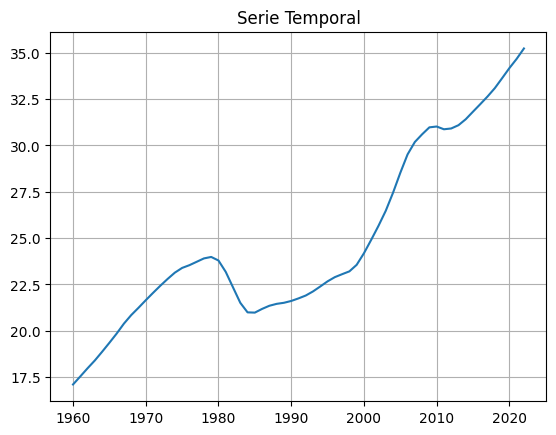

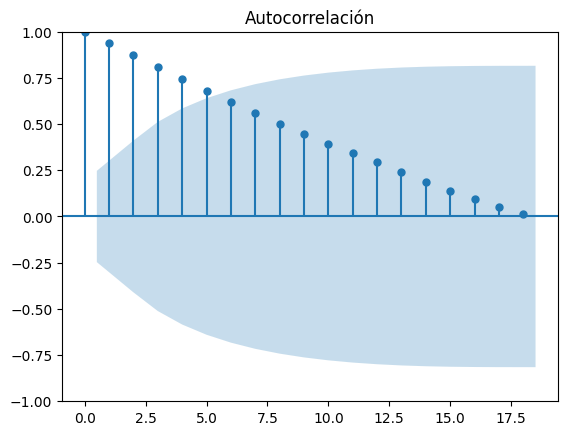

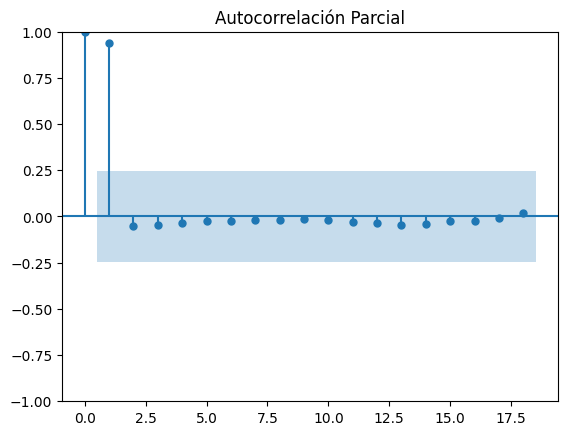

In [68]:
Modelo.Graficos()

In [69]:
import subprocess
warnings.filterwarnings('ignore')
Modelo.Pruebatoolkit(5)
warnings.resetwarnings()

Mejor orden encontrado: (3, 0, 1) con AIC: -103.20395185816444


In [70]:
warnings.filterwarnings('ignore')
Modelo.ModeloARMA(3,1)
warnings.resetwarnings()

In [71]:
print(Modelo.summary)

                                                                       SARIMAX Results                                                                       
Dep. Variable:     Tasa de inactividad por edades, personas de 65 años y más (% de la población en edad de trabajar)   No. Observations:                   63
Model:                                                                                                ARIMA(3, 0, 1)   Log Likelihood                  57.602
Date:                                                                                               Thu, 23 Nov 2023   AIC                           -103.204
Time:                                                                                                       10:39:25   BIC                            -90.345
Sample:                                                                                                            0   HQIC                           -98.147
                                                    